In [24]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_precision_recall_curve

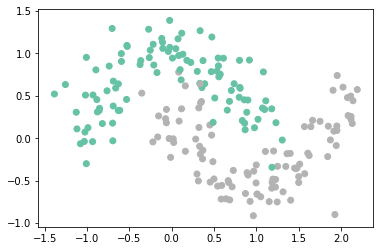

In [2]:
X,y=datasets.make_moons(200,noise=.2,random_state=2718)
x_test,y_test=datasets.make_moons(40,noise=.2,random_state=31415)
plt.scatter(*X.T,c=y,cmap="Set2")

In [3]:
model= Pipeline([
        ("poly", PolynomialFeatures(30,include_bias=False)),
         ("lreg", LogisticRegression(penalty="none"))
    ])

In [4]:
model.fit(X,y)

/home/abraham/anaconda4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [5]:
bagging_logreg = BaggingClassifier(model,n_estimators=100,random_state=314,n_jobs=-1)

In [7]:
bagging_logreg.fit(X,y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('lreg',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                             

In [8]:
bagging_logreg.score(x_test,y_test)

0.95

In [9]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_classf_model(X, y, model, ax, title=None, step=0.01, epsilon=0.1, contour=False):
    """
    Contourplot a two-class underlying model, and test datapoints.
    
    Paramters
    ---------
    X: Matrix(mxn, R)
        Matrix of feature vectors with examples
    y: n-dimensional vector 
        Actual classes for each of the 'm' provided examples.
    """
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    points_cmap = ListedColormap(["Yellow", "Blue"])
    x0, x1 = X[:,0].min() - epsilon, X[:,0].max() + epsilon
    y0, y1 = X[:,1].min() - epsilon, X[:,1].max() + epsilon
    
    xx, yy = np.mgrid[x0:x1:step, y0:y1:step]
    
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    if contour:
        ax.contour(xx, yy, preds)
    ax.pcolormesh(xx, yy, preds, cmap=custom_cmap)
    ax.scatter(*X.T, c=y, s=50, edgecolor="k", cmap=points_cmap)
    if title is not None:
        ax.set_title(title)

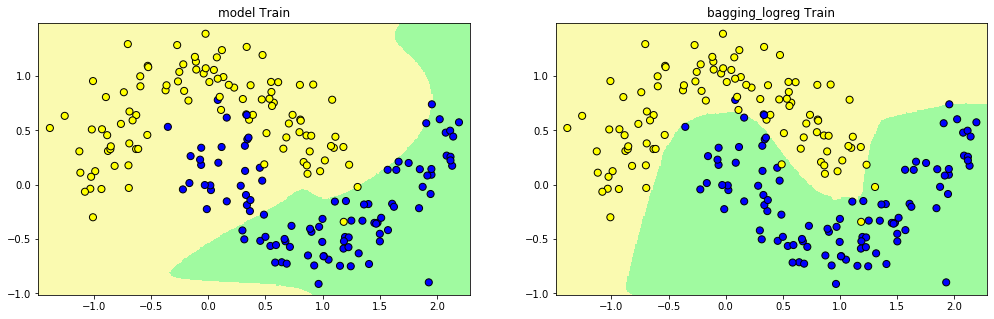

In [11]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_classf_model(X, y, model, ax, title="model Train", step=0.01, epsilon=0.1, contour=False)
plot_classf_model(X, y, bagging_logreg, ax2, title="bagging_logreg Train", step=0.01, epsilon=0.1, contour=False)
#plot_classf_model(x_test, y_test, bagging_logreg, ax2, title="bagging_logreg Test", step=0.01, epsilon=0.1, contour=False)

**Podemos ver que model tiene un recall menor que bagging_logreg, es decir a model le falta capturar ciertos puntos en azul o 1's, cosa que bagging_logreg si hace , de hecho se puede concluir gráficamente que model ambos modelos tienen un precision parecido en la clase (azules) pero tanto el accuracy como el recall es mejor el de bagging_logreg.**

**Hacemos las predicciones..**

In [16]:
ypred_model=model.predict(x_test)
ypred_bagg=bagging_logreg.predict(x_test)

**Calculando el f1-score..**

In [19]:
print(f"el f1-score de model es: {f1_score(y_test,ypred_model):.1%}")
print(f"el f1-score de bagging_logreg es: {f1_score(y_test,ypred_bagg):.1%}")

el f1-score de model es: 80.0%
el f1-score de bagging_logreg es: 95.0%


**Con el f1-score podemos confirmar lo que gráficamente se muestra en las gráficas bagging tuvo un 95%, lo que muestra un mayor recall y precision que model y eso se refleja en el f1-score vs. 80% de model**

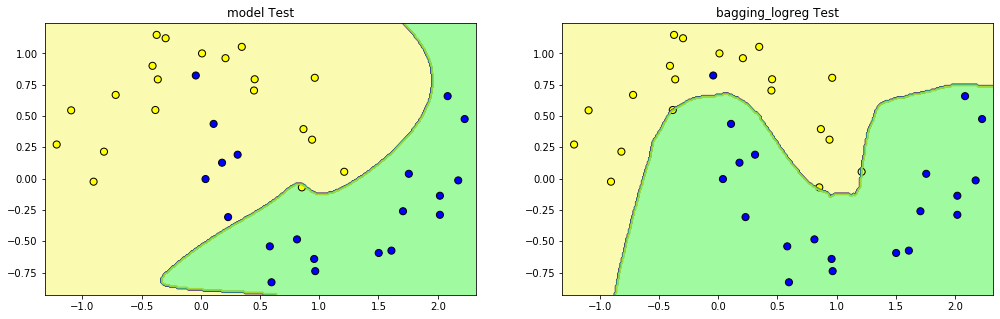

In [23]:
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_classf_model(x_test, y_test, model, ax, title="model Test", step=0.01, epsilon=0.1, contour=True)
plot_classf_model(x_test, y_test, bagging_logreg, ax2, title="bagging_logreg Test", step=0.01, epsilon=0.1, contour=True)

# Curva Precision-Recall

Text(0.5, 1.0, 'Bagging Precision-Recall curve en Test:')

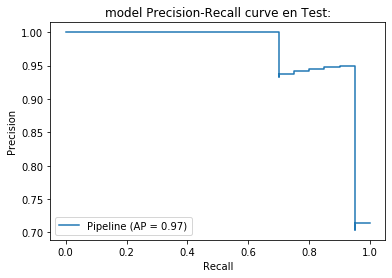

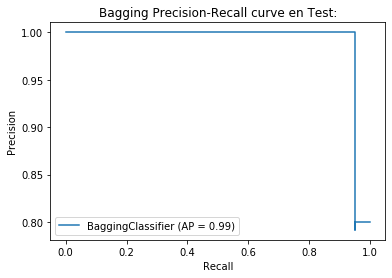

In [44]:
disp = plot_precision_recall_curve(model, x_test, y_test)
disp.ax_.set_title('model Precision-Recall curve en Test:')
disp = plot_precision_recall_curve(bagging_logreg, x_test, y_test)
disp.ax_.set_title('Bagging Precision-Recall curve en Test:')

**Como vemos la curva precision-recall de bagging tiene una precision de 1 hasta casi el .95 de recall cuando model tiene esa pecision hast el .7 de recall, recordar quela relacion es inversa entre ambas metricas.**